# Is it Worth it to Fire Your Coach in the NFL?
## Nik Greb, Matt Mascavage, Owen Kim
### December 7, 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
df = pd.read_csv('NFLCoaches.csv')
df.head()

,Year,Coach,Team,Games Played,Wins,Losses,Win %,Points Scored,Points Against,Point Differential,Tie
0,2002,Gregg Williams,Buffalo Bills,16,8,8,0.5000,379,397,-18,0
1,2003,Gregg Williams,Buffalo Bills,16,6,10,0.3750,243,279,-36,0
2,2004,Mike Mularkey,Buffalo Bills,16,9,7,0.5625,395,284,111,0
3,2005,Mike Mularkey,Buffalo Bills,16,5,11,0.3125,271,367,-96,0
4,2006,Dick Jauron,Buffalo Bills,16,7,9,0.4375,300,311,-11,0


First, let's look at a scatterplot of the win percentage of each NFL team against the total number of coaches that they have had between 2002 and 2023:

In [ ]:
# Calculate total win percentage for each team
team_win_percentage = df.groupby('Team')['Win %'].mean().reset_index()
team_win_percentage.rename(columns={'Win %': 'Total Win Percentage'}, inplace=True)

# Calculate the number of different coaches for each team
coaches_per_team = df.groupby('Team')['Coach'].nunique().reset_index()
coaches_per_team.rename(columns={'Coach': 'Number of Different Coaches'}, inplace=True)

# Merge the two DataFrames to create the final DataFrame
final_df = pd.merge(team_win_percentage, coaches_per_team, on='Team')
final_df.head()

,Team,Total Win Percentage,Number of Different Coaches
0,49ers,0.498612,8
1,Bears,0.460395,6
2,Bengals,0.484327,3
3,Broncos,0.506213,10
4,Browns,0.334913,11


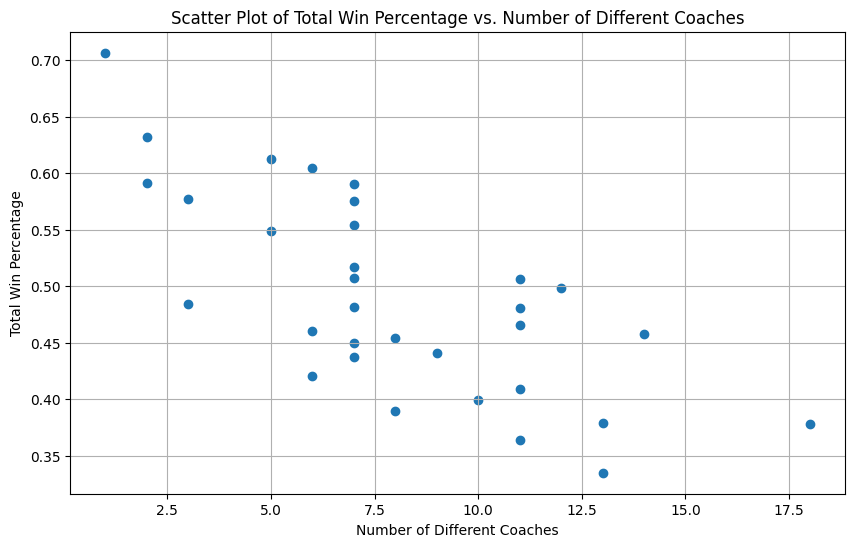

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Number of Different Coaches'], final_df['Total Win Percentage'])
plt.xlabel('Number of Different Coaches')
plt.ylabel('Total Win Percentage')
plt.title('Scatter Plot of Total Win Percentage vs. Number of Different Coaches')
plt.grid(True)
plt.show()

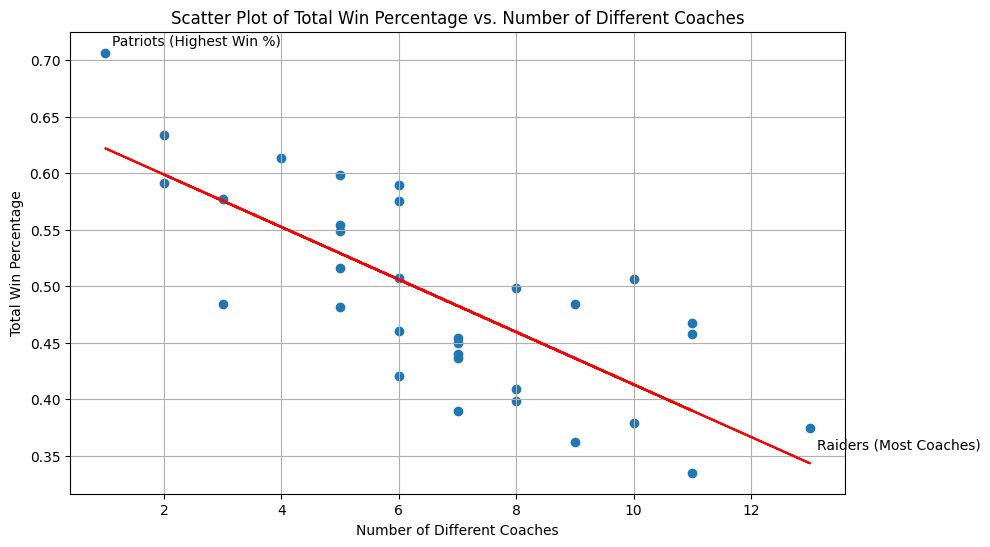

Correlation Coefficient (r): -0.7578094400216127


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Number of Different Coaches'], final_df['Total Win Percentage'])
plt.xlabel('Number of Different Coaches')
plt.ylabel('Total Win Percentage')
plt.title('Scatter Plot of Total Win Percentage vs. Number of Different Coaches')
plt.grid(True)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(final_df['Number of Different Coaches'], final_df['Total Win Percentage'])

# Plot the regression line
plt.plot(final_df['Number of Different Coaches'], slope * final_df['Number of Different Coaches'] + intercept, color='red')


# Find the team with the highest win percentage
highest_win_team = final_df.loc[final_df['Total Win Percentage'].idxmax()]

# Find the team with the most coaches
most_coaches_team = final_df.loc[final_df['Number of Different Coaches'].idxmax()]

# Add labels to the plot
plt.annotate(f"{highest_win_team['Team']} (Highest Win %)",
             (highest_win_team['Number of Different Coaches'], highest_win_team['Total Win Percentage']),
             textcoords="offset points", xytext=(5, 5), ha='left')

plt.annotate(f"{most_coaches_team['Team']} (Most Coaches)",
             (most_coaches_team['Number of Different Coaches'], most_coaches_team['Total Win Percentage']),
             textcoords="offset points", xytext=(5, -15), ha='left')


plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient (r): {r_value}")

Clearly, there is a correlation between the number of coaches an NFL team has and the success of the team. Teams that do not fire their coach as often obviously have more wins, as shown by our linear regression model above. But do the teams who do fire their coach actually get better following the firing? One way to try to answer this question is by creating two histograms, one showing the distribution of win percentages of teams in the last season before firing their coach, and one showing the distribution of win percentages of teams in the first season after hiring their new coach. We carried this out in the following code and plots.

In [ ]:
# Group by 'Coach' and get the first row of each group
new_coach = df.groupby('Coach').first().reset_index()


new_coach = new_coach[new_coach['Year'] != 2002]

new_coach.head()

,Coach,Year,Team,Games Played,Wins,Losses,Win %,Points Scored,Points Against,Point Differential,Tie
0,Aaron Kromer,2012,Saints,6,2,4,0.3333,176,182,-6,0
1,Adam Gase,2016,Dolphins,16,10,6,0.6250,363,380,-17,0
2,Andy Reid,2013,Chiefs,16,11,5,0.6875,430,305,125,0
3,Anthony Lynn,2016,Buffalo Bills,1,0,1,0.0000,10,30,-20,0
4,Antonio Pierce,2023,Raiders,9,5,4,0.5556,206,144,62,0


In [ ]:
# Group by 'Coach' and get the last row of each group
old_coach = df.groupby('Coach').last().reset_index()

old_coach = old_coach[old_coach['Year'] != 2023]

old_coach.head()

,Coach,Year,Team,Games Played,Wins,Losses,Win %,Points Scored,Points Against,Point Differential,Tie
0,Aaron Kromer,2012,Saints,6,2,4,0.3333,176,182,-6,0
1,Adam Gase,2020,Jets,16,2,14,0.1250,243,457,-214,0
2,Andy Reid,2012,Eagles,16,4,12,0.2500,280,444,-164,0
3,Anthony Lynn,2020,Chargers,16,7,9,0.4375,384,426,-42,0
5,Art Shell,2006,Raiders,16,2,14,0.1250,168,332,-164,0


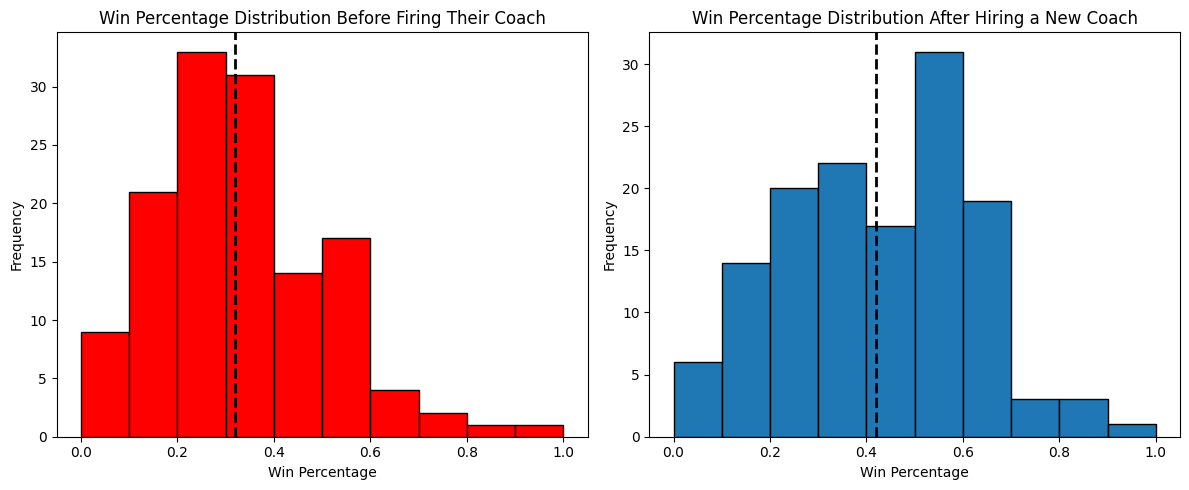

In [ ]:
# Plot Win Percentage Distributions of Seasons Preceding and Following a Coach Firing
plt.figure(figsize=(12, 5))

# Histogram for new coaches
plt.subplot(1, 2, 1)
plt.hist(old_coach['Win %'], bins=10, color = 'red',edgecolor='black')
plt.title('Win Percentage Distribution Before Firing Their Coach')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.axvline(x=0.32, color='black', linestyle='--', linewidth=2)

# Histogram for last coaches
plt.subplot(1, 2, 2)
plt.hist(new_coach['Win %'], bins=10,edgecolor='black')
plt.title('Win Percentage Distribution After Hiring a New Coach')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.axvline(x=0.42, color='black', linestyle='--', linewidth=2)

plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

In [ ]:
# Calculate the mean of 'Win %' for new and last coaches
mean_new_coach = new_coach['Win %'].mean()
mean_last_coach = old_coach['Win %'].mean()

print(f"Mean win percentage for new coaches: {mean_new_coach}")
print(f"Mean win percentage for old coaches: {mean_last_coach}")

Mean win percentage for new coaches: 0.4197330882352941
Mean win percentage for old coaches: 0.3235977443609023


On average, it seems that based on the calculated means and plotted histograms the distribution of win percentage shifts slightly to the right after hiring a new coach. This is confirmed in the difference in means, with the average win percentage of teams in the season before firing a coach is 32.3% and after hiring a new one the average win percentage jumps to 41.9%, a seemingly significant increase. This data is also represented in the side by side boxplot below.

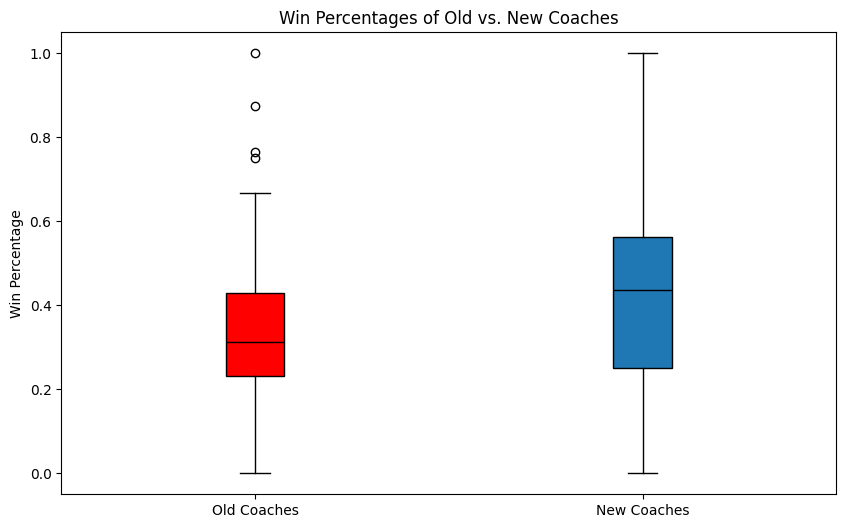

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Boxplot for old coaches
plt.boxplot(old_coach['Win %'], positions=[1], patch_artist=True, boxprops=dict(facecolor='red'), medianprops=dict(color='black'))

# Boxplot for new coaches
plt.boxplot(new_coach['Win %'], positions=[2], patch_artist=True, medianprops=dict(color='black'))


plt.xticks([1, 2], ['Old Coaches', 'New Coaches'])
plt.ylabel('Win Percentage')
plt.title('Win Percentages of Old vs. New Coaches')
plt.show()

Now we filter the dataframe looking for only the years in which a team fired their coach in the middle of the season and plot those histograms and calculate their means to determine if there is a difference in team performance in the middle of a single season by firing their coach, with most other characteristics (i.e. roster composition, assistant coaches, payroll, etc.) held roughly constant during the course of a single season.

In [ ]:
# Count the occurrences of each team in each year
team_year_counts = df.groupby(['Team', 'Year']).size().reset_index(name='counts')

# Filter to keep only the teams that appear twice in a given year
filtered_teams = team_year_counts[team_year_counts['counts'] == 2]

# Merge the filtered data back to the original DataFrame to get the rows
mid_season = pd.merge(df, filtered_teams, on=['Team', 'Year'])
mid_season.head()

,Year,Coach,Team,Games Played,Wins,Losses,Win %,Points Scored,Points Against,Point Differential,Tie,counts
0,2009,Dick Jauron,Buffalo Bills,9,3,6,0.3333,140,210,-70,0,2
1,2009,Perry Fewell,Buffalo Bills,7,3,4,0.4286,118,116,2,0,2
2,2016,Rex Ryan,Buffalo Bills,15,7,8,0.4667,389,348,41,0,2
3,2016,Anthony Lynn,Buffalo Bills,1,0,1,0.0000,10,30,-20,0,2
4,2004,Dave Wannstedt,Dolphins,9,1,8,0.1111,123,186,-63,0,2


In [ ]:

# Group by 'Team' and 'Year' and get the first/last occurrence of each group
mid_season_firstCoach = mid_season.groupby(['Team', 'Year']).first().reset_index()
mid_season_newCoach = mid_season.groupby(['Team', 'Year']).last().reset_index()

mid_season_newCoach.head()

,Team,Year,Coach,Games Played,Wins,Losses,Win %,Points Scored,Points Against,Point Differential,Tie,counts
0,49ers,2008,Mike Singletary,9,5,4,0.5556,181,185,-4,0,2
1,49ers,2010,Jim Tomsula,1,1,0,1.0000,38,7,31,0,2
2,Broncos,2010,Eric Studesville,4,1,3,0.2500,88,138,-50,0,2
3,Broncos,2022,Jerry Rosburg,2,1,1,0.5000,55,55,0,0,2
4,Browns,2004,Terry Robiskie,5,1,4,0.2000,51,124,-73,0,2


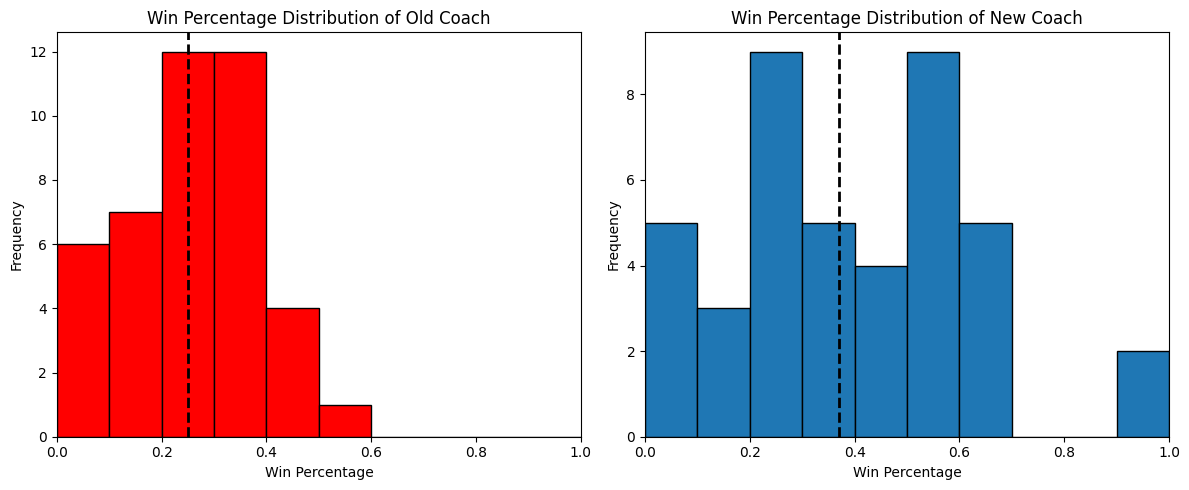

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram for first coaches
plt.subplot(1, 2, 1)
plt.hist(mid_season_firstCoach['Win %'], bins=10, color='red', edgecolor='black', range=(0, 1))
plt.title('Win Percentage Distribution of Old Coach')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Set x-axis limit
plt.axvline(x=0.25, color='black', linestyle='--', linewidth=2)

# Histogram for last coaches
plt.subplot(1, 2, 2)
plt.hist(mid_season_lastCoach['Win %'], bins=10, edgecolor='black', range=(0, 1))
plt.title('Win Percentage Distribution of New Coach')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Set x-axis limit
plt.axvline(x=0.37, color='black', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean of 'W/L %' for the mid-season coaches
mean_mid_season_firstCoach = mid_season_firstCoach['Win %'].mean()
mean_mid_season_newCoach = mid_season_lastCoach['Win %'].mean()

median_mid_season_firstCoach = mid_season_firstCoach['Win %'].median()
median_mid_season_newCoach = mid_season_lastCoach['Win %'].median()

print(f"Mean win percentage for old coaches: {mean_mid_season_firstCoach}")
print(f"Mean win percentage for  new coaches: {mean_mid_season_lastCoach}")

Mean win percentage for old coaches: 0.2538904761904762
Mean win percentage for last new coaches: 0.3785452380952381


There are two data points where the new coach coached only one game and won, lets remove those observations and consider them outliers and reexamine.

In [ ]:
# Remove rows where the new coach only coached one game
mid_season_newCoach = mid_season_newCoach[mid_season_newCoach['Games Played'] > 1]

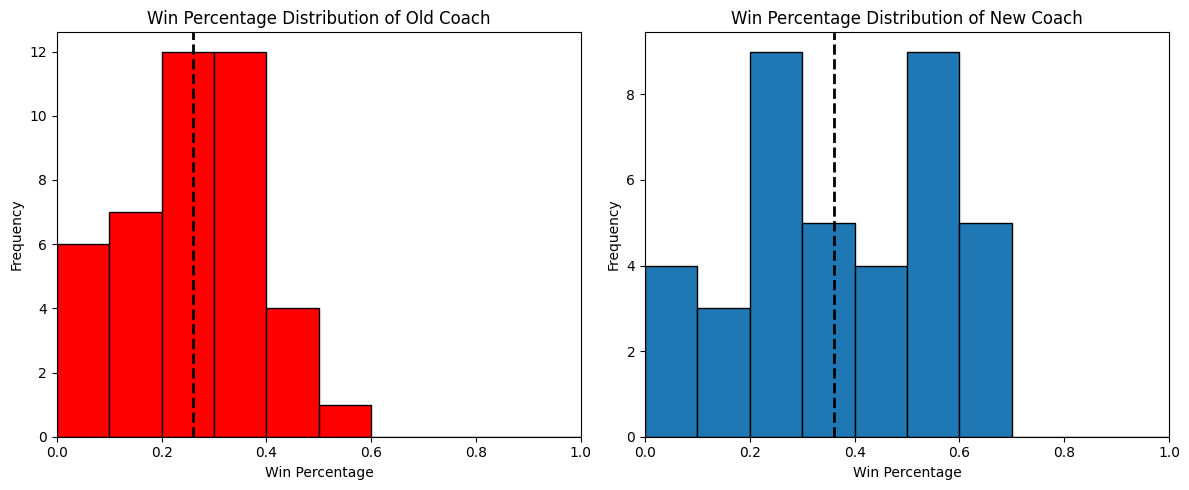

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram for first coaches
plt.subplot(1, 2, 1)
plt.hist(mid_season_firstCoach['Win %'], bins=10, color='red', edgecolor='black', range=(0, 1))
plt.title('Win Percentage Distribution of Old Coach')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Set x-axis limit
plt.axvline(x=0.26, color='black', linestyle='--', linewidth=2)

# Histogram for new coaches
plt.subplot(1, 2, 2)
plt.hist(mid_season_newCoach['Win %'], bins=10, edgecolor='black', range=(0, 1))
plt.title('Win Percentage Distribution of New Coach')
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Set x-axis limit
plt.axvline(x=0.36, color='black', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
# calculate the mean
mean_mid_season_firstCoach = mid_season_firstCoach['Win %'].mean()
mean_mid_season_newCoach = mid_season_newCoach['Win %'].mean()

print(f"Mean win percentage for old coaches: {mean_mid_season_firstCoach}")
print(f"Mean win percentage for  new coaches: {mean_mid_season_newCoach}")

Mean win percentage for old coaches: 0.2538904761904762
Mean win percentage for  new coaches: 0.3563820512820513


There is another statistic that may be useful in determining team success, point differential. Wins and losses are not the only indicator of team progress, as a bad team can improve their point differential from year to year and that can be viewed as positive progress.

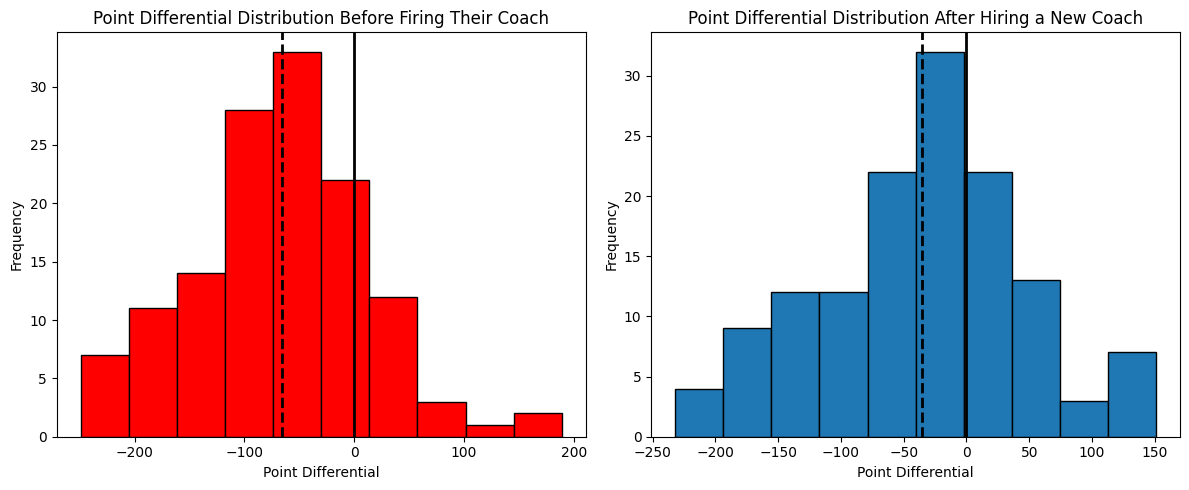

In [ ]:
# Point Differential Comparison
plt.figure(figsize=(12, 5))

# Histogram for new coaches
plt.subplot(1, 2, 1)
plt.hist(old_coach['Point Differential'], bins=10, color = 'red',edgecolor='black')
plt.title('Point Differential Distribution Before Firing Their Coach')
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.axvline(x=-66, color='black', linestyle='--', linewidth=2)
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)


# Histogram for last coaches
plt.subplot(1, 2, 2)
plt.hist(new_coach['Point Differential'], bins=10,edgecolor='black')
plt.title('Point Differential Distribution After Hiring a New Coach')
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.axvline(x=-35, color='black', linestyle='--', linewidth=2)
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)


plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

In [ ]:
# calculate the mean point differential of the two groups
mean_pd_old_coach = old_coach['Point Differential'].mean()
mean_pd_new_coach = new_coach['Point Differential'].mean()

In [ ]:
print(f"Mean point differential for old coaches: {mean_pd_old_coach}")
print(f"Mean point differential for  new coaches: {mean_pd_new_coach}")

Mean point differential for old coaches: -66.53383458646617
Mean point differential for  new coaches: -35.51470588235294
